In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/DLS_grid.csv", encoding = "ISO-8859-1") # Read csv file
df.replace("--", np.nan, inplace=True) # Replace -- with NaN
# Change object types to float
df[["Radius (nm)", "Range1 Radius (I) (0.1-10nm)", "Range1 %Pd (I)"]] = df[["Radius (nm)", "Range1 Radius (I) (0.1-10nm)", "Range1 %Pd (I)"]].astype(float)

C:\Users\BEIM\AppData\Local\Temp\ipykernel_24060\3164706307.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("--", np.nan, inplace=True)


In [3]:
temp_grouped = df.groupby(["Set Temp (C)"])
temp_grouped.get_group(25.0)["Radius (nm)"]

C:\Users\BEIM\AppData\Local\Temp\ipykernel_24060\846368836.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  temp_grouped.get_group(25.0)["Radius (nm)"]


0        2.21
1     1796.85
2        1.95
3        2.59
4        1.99
       ...   
91       3.40
92       1.58
93     482.33
94       1.92
95      74.02
Name: Radius (nm), Length: 96, dtype: float64

In [4]:
well_grouped = df.groupby("Well")
well_grouped.get_group("A5")

,Item,Well,Set Temp (C),Normalized Intensity (Cnt/s),Radius (nm),%PD,Mw-R (kDa),Range1 Radius (I) (0.1-10nm),Range1 %Pd (I),Range1 %Intensity (I),...,Range4 %Mass (I),Range5 Radius (I) (5000-10000nm),Range5 %Pd (I),Range5 %Intensity (I),Range5 %Mass (I),% Acqs Unmarked,Acq Time (s),Attenuation Level (%),Intensity (Cnt/s),Laser Power (%)
4,A5,A5,25.0,2989544,1.99,33.3,16.8,2.10,23.41,87.4,...,NaN,NaN,NaN,NaN,NaN,87,5.0,0.0,896863,30.0
100,A5,A5,35.0,3316935,2.72,Multimodal,35.0,1.57,35.44,81.9,...,NaN,NaN,NaN,NaN,NaN,100,5.0,0.0,829234,25.0
196,A5,A5,45.0,3074346,2.66,Multimodal,33.2,1.54,25.37,84.0,...,NaN,NaN,NaN,NaN,NaN,87,5.0,4.7,1024975,35.0
292,A5,A5,55.0,3367936,2.89,Multimodal,40.2,1.49,26.54,80.9,...,NaN,NaN,NaN,NaN,NaN,62,5.0,11.6,1042414,35.0
388,A5,A5,65.0,4588319,3.34,Multimodal,56.6,1.67,30.02,74.0,...,NaN,NaN,NaN,NaN,NaN,50,5.0,0.0,1147080,25.0
484,A5,A5,75.0,33403315,10.42,Multimodal,810.0,2.35,22.70,39.0,...,NaN,NaN,NaN,NaN,NaN,100,5.0,45.0,1837182,10.0
580,A5,A5,85.0,4897499,4.04,Multimodal,88.5,3.51,23.37,78.1,...,NaN,NaN,NaN,NaN,NaN,100,5.0,38.4,753725,25.0


In [5]:
well_grouped["Range1 %Pd (I)"].mean()

Well
A1     21.815714
A10          NaN
A11    25.850000
A12    27.017143
A2           NaN
         ...    
H5     19.296000
H6     22.168000
H7     32.240000
H8     40.756000
H9     32.984000
Name: Range1 %Pd (I), Length: 96, dtype: float64

TypeError: annotate() missing 1 required positional argument: 'xy'

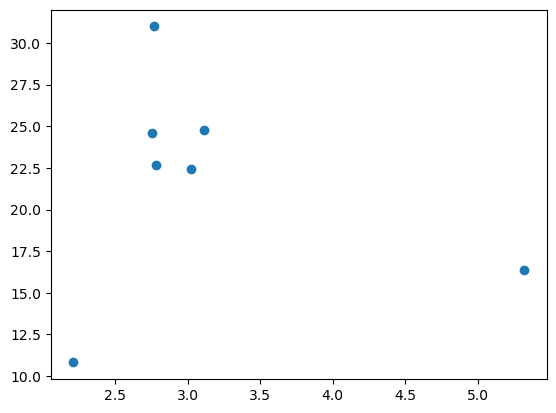

In [6]:
plt.scatter(well_grouped.get_group("A1")["Radius (nm)"], well_grouped.get_group("A1")["Range1 %Pd (I)"])
for i, label in enumerate(well_grouped.get_group("A1")["Set Temp (C)"]):
    plt.annotate(label, )

In [6]:
df.loc[df["Set Temp (C)"] == 25.0, ["Radius (nm)","Range1 %Pd (I)"]]

,Radius (nm),Range1 %Pd (I)
0,2.21,10.82
1,1796.85,NaN
2,1.95,29.01
3,2.59,12.91
4,1.99,23.41
...,...,...
91,3.40,34.54
92,1.58,32.40
93,482.33,49.33
94,1.92,22.44


In [20]:
# Create Radius Data frame


radius = df.loc[df["Set Temp (C)"] == 25.0, ["Well"]]

for index, row in df.iterrows():
    if row['Well'] == 'A1':
        temperature = row['Set Temp (C)']
        radius[str(temperature)] = df.loc[df["Set Temp (C)"] == temperature, ['Radius (nm)']].values

In [45]:
def split_by_temp(dataframe: pd.DataFrame,
                  column: str, 
                  column_temperature = 'Set Temp (C)', 
                  column_well = 'Well', 
                  start_temperature = 25.0
                  ) -> pd.DataFrame:
    """
    Takes an input data frame and the name of the column that should be split, and divides
    this column into a 2d data frame with the Well IDs as the first column, and each temperature 
    the experiment was ran at in subsequent columns.

    Inputs: 
        dataframe 
            type: pd.DataFrame 
            description: dataframe with a format generated by Wyatt Dynamics DLS software.
        column 
            type: str
            description: string referencing the name of the column in dataframe where the 
                         desired output values are stored.
        column_temperature
            type: str
            default value: 'Set Temp (C)'
            description: Name of the column containing the set temperature data.
        column_well
            type: str
            default value: 'Well'
            description: Name of the column containing the well information in the dataframe.
        start_temperature
            type: float
            default value: 25.0
            description: First temperature at which the experiment was run at. See the first 
                         value in the set temperature column if unsure.
    
    Output:
        type: pd.DataFrame

    Example:
        radius = split_by_temp(df, 'Radius (nm)')
        print(radius)

        >      Well      25C      35C       45C      55C       65C        75C      85C
        >   0    A1     2.21     2.77      2.75     2.78      3.02       3.11     5.32
        >   1    A2  1796.85  1105.19  15546.31  9875.37  11783.51   16179.94  8815.53
        >   2    A3     1.95     2.00      2.98     2.92      2.88       3.27    39.60
        >   3    A4     2.59     2.49      2.93     2.41      3.21       3.97     4.03
        >   4    A5     1.99     2.72      2.66     2.89      3.34      10.42     4.04
        >   ..  ...      ...      ...       ...      ...       ...        ...      ...
        >   91   H8     3.40     3.29      3.08     3.11      3.52     472.80      NaN
        >   92   H9     1.58     2.28      2.38     2.43      4.18     512.16      NaN
        >   93  H10   482.33   849.22   2085.64  2497.46      2.17  266799.55      NaN
        >   94  H11     1.92     2.53     27.36     2.75      1.16     197.88      NaN
        >   95  H12    74.02    86.16      9.69     1.48      1.42     678.38      NaN
        >
        >   [96 rows x 8 columns]
    """
    # Create framework for output dataframe with well numbers
    output = dataframe.loc[dataframe[column_temperature] == start_temperature, [column_well]]

    for index, row in dataframe.iterrows(): # Iterate each row in dataframe

        if row[column_well] == dataframe.at[0,column_well]: # Skip all rows that are not referencing the first well
            set_temperature = row[column_temperature] # Set current temperature
            new_column_name = str(set_temperature).split(sep='.')[0] + 'C' # Re-format set temperature to desired column name

            output[new_column_name] = dataframe.loc[ # create new column for set temperature in output
                dataframe[column_temperature] == set_temperature, # find values in dataframe where the temperature == set temperature
                [column] # find all values of interest corresponding to the boolean check above
                ].values # only extract the values as a numpy array
    return output 

In [48]:
radius = split_by_temp(df, 'Radius (nm)')
radius

,Well,25C,35C,45C,55C,65C,75C,85C
0,A1,2.21,2.77,2.75,2.78,3.02,3.11,5.32
1,A2,1796.85,1105.19,15546.31,9875.37,11783.51,16179.94,8815.53
2,A3,1.95,2.00,2.98,2.92,2.88,3.27,39.60
3,A4,2.59,2.49,2.93,2.41,3.21,3.97,4.03
4,A5,1.99,2.72,2.66,2.89,3.34,10.42,4.04
...,...,...,...,...,...,...,...,...
91,H8,3.40,3.29,3.08,3.11,3.52,472.80,NaN
92,H9,1.58,2.28,2.38,2.43,4.18,512.16,NaN
93,H10,482.33,849.22,2085.64,2497.46,2.17,266799.55,NaN
94,H11,1.92,2.53,27.36,2.75,1.16,197.88,NaN


In [49]:
polydispersity = split_by_temp(df, '%PD')
polydispersity

ValueError: 2

In [55]:
radius['test'] = df.loc[ # create new column for set temperature in output
    df['Set Temp (C)'] == 25.0, # find values in dataframe where the temperature == set temperature
    ['%PD'] # find all values of interest corresponding to the boolean check above
    ].values # only extract the values as a numpy array

ValueError: 2

In [58]:
len(df.loc[ # create new column for set temperature in output
    df['Set Temp (C)'] == 25.0, # find values in dataframe where the temperature == set temperature
    ['%PD'] # find all values of interest corresponding to the boolean check above
    ].values)

96

In [59]:
# Note ^^ figure out what ValueError 2 means. So far only occurs when using '%PD'